In [10]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np

papers = pd.read_csv("Dataset/papers.csv")
print(papers.shape)
papers.head()

(7241, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


Text(0.5, 1.0, 'Number of papers published each year')

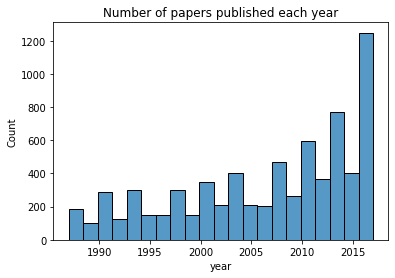

In [11]:
papers.drop(['id', 'event_type', 'pdf_name'], axis=1, inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.histplot(data=papers, x="year")
fig.set_title("Number of papers published each year")

In [12]:
import re
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
 
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
# papers['title_processed'] = papers['title_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

papers['title_processed'] = papers['title_processed'].str.lower()

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

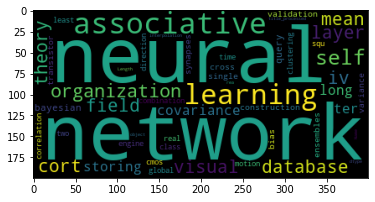

In [13]:
long_string = papers['title_processed']
#generate a wordcloud object and visualize it
wordcloud = WordCloud().generate(str(long_string))
plt.imshow(wordcloud)
plt.show(wordcloud)


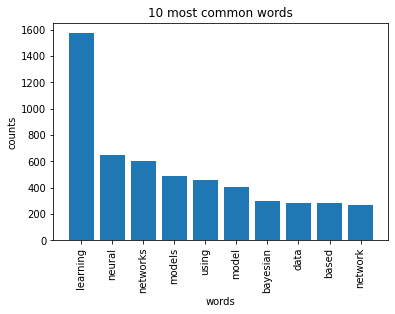

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def get_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words ='english')

count_data = count_vectorizer.fit_transform(long_string)

get_common_words(count_data, count_vectorizer)

In [17]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def topics_finder(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics)
lda.fit(count_data)


print("Topics found via LDA:")
topics_finder(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning classification kernel analysis matching data bounds metric online functions

Topic #1:
gaussian inference process variational processes sparse reduction monte carlo bayesian

Topic #2:
learning decision markov bayesian multi models reinforcement function inference time

Topic #3:
models using learning high dimensional graphical sampling linear estimation hidden

Topic #4:
learning bayesian structured propagation regression human networks belief inference sparse

Topic #5:
linear matrix approach non rank analysis dynamic low probabilistic models

Topic #6:
neural networks network recognition recurrent deep learning training speech using

Topic #7:
learning large supervised vector scale semi data local algorithm support

Topic #8:
learning model visual feature using selection based time clustering unsupervised

Topic #9:
learning optimization stochastic gradient descent adaptive spike online analog convex
